In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import resample, shuffle
import matplotlib.pyplot as plt

data = pd.read_csv('/content/dataset.csv')
data

,timestamps,TP9,AF7,AF8,TP10,Right AUX,Emotion,Subject
0,1533222560,59.105,28.320,15.137,12.207,54.199,Stressed,Subject A
1,1533222560,62.012,30.273,43.945,11.719,79.102,Stressed,Subject A
2,1533222560,44.922,30.273,-97.656,11.230,32.715,Stressed,Subject A
3,1533222560,28.809,27.832,-110.352,9.277,29.785,Stressed,Subject A
4,1533222560,36.156,28.809,-73.242,11.230,50.781,Stressed,Subject A
...,...,...,...,...,...,...,...,...
319771,1533057257,11.230,14.648,40.039,10.254,-23.926,relaxed,Subject D
319772,1533057257,-1.465,12.207,29.297,0.000,40.039,relaxed,Subject D
319773,1533057257,-4.395,10.742,28.809,-7.812,50.293,relaxed,Subject D
319774,1533057257,29.785,11.719,29.785,1.465,-0.977,relaxed,Subject D


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319776 entries, 0 to 319775
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   timestamps  319776 non-null  int64  
 1   TP9         319776 non-null  float64
 2   AF7         319776 non-null  float64
 3   AF8         319776 non-null  float64
 4   TP10        319776 non-null  float64
 5   Right AUX   319776 non-null  float64
 6   Emotion     319776 non-null  object 
 7   Subject     319776 non-null  object 
dtypes: float64(5), int64(1), object(2)
memory usage: 19.5+ MB


In [3]:
data.isnull().sum()

,0
timestamps,0
TP9,0
AF7,0
AF8,0
TP10,0
Right AUX,0
Emotion,0
Subject,0


In [4]:
data[data.duplicated()].sum()

,0
timestamps,0
TP9,0.0
AF7,0.0
AF8,0.0
TP10,0.0
Right AUX,0.0
Emotion,0
Subject,0


In [5]:
data = data.drop(columns = ['timestamps', 'Subject'], axis = 1)
data = data.replace(['neutral', 'relaxed'], 'Unstressed')
data.tail()

,TP9,AF7,AF8,TP10,Right AUX,Emotion
319771,11.230,14.648,40.039,10.254,-23.926,Unstressed
319772,-1.465,12.207,29.297,0.000,40.039,Unstressed
319773,-4.395,10.742,28.809,-7.812,50.293,Unstressed
319774,29.785,11.719,29.785,1.465,-0.977,Unstressed
319775,38.574,14.648,32.715,6.836,-27.344,Unstressed


In [6]:
Stressed = data[data['Emotion'] == 'Stressed']
Unstressed = data[data['Emotion'] == 'Unstressed']
print(Stressed.shape)
print(Unstressed.shape)

(93984, 6)
(225792, 6)


In [7]:
Unstressed = pd.concat([Unstressed.iloc[:25000], Unstressed.iloc[-25000:]])
Stressed = Stressed.iloc[:50000]
data = pd.concat([Stressed, Unstressed])
data.shape

(100000, 6)

In [8]:
from sklearn.utils import shuffle
data = shuffle(data)
data.head()

,TP9,AF7,AF8,TP10,Right AUX,Emotion
19778,2.441,37.109,64.941,0.977,25.391,Stressed
297224,-28.809,66.406,5.859,-48.828,28.809,Unstressed
34768,20.020,39.062,-2.930,23.438,66.406,Unstressed
20407,25.879,45.898,-455.566,-33.203,-3.906,Stressed
315596,4.883,7.324,6.836,13.184,-4.395,Unstressed


In [9]:
data = data.reset_index(drop = True)
data.head()

,TP9,AF7,AF8,TP10,Right AUX,Emotion
0,2.441,37.109,64.941,0.977,25.391,Stressed
1,-28.809,66.406,5.859,-48.828,28.809,Unstressed
2,20.020,39.062,-2.930,23.438,66.406,Unstressed
3,25.879,45.898,-455.566,-33.203,-3.906,Stressed
4,4.883,7.324,6.836,13.184,-4.395,Unstressed


In [10]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
sc = StandardScaler()
data['Emotion'] = le.fit_transform(data['Emotion'])
data.head()

,TP9,AF7,AF8,TP10,Right AUX,Emotion
0,2.441,37.109,64.941,0.977,25.391,0
1,-28.809,66.406,5.859,-48.828,28.809,1
2,20.020,39.062,-2.930,23.438,66.406,1
3,25.879,45.898,-455.566,-33.203,-3.906,0
4,4.883,7.324,6.836,13.184,-4.395,1


In [11]:
X = data.drop(columns = ['Emotion'], axis = 1)
Y = data['Emotion']

X = sc.fit_transform(X)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 2, shuffle = True)

In [13]:
X_test, X_valid, Y_test, Y_valid = train_test_split(X_test, Y_test, test_size = 0.25, random_state = 21, shuffle = True)
print(X_train.shape, X_test.shape, X_valid.shape)
print(Y_train.shape, Y_test.shape, Y_valid.shape)

(70000, 5) (22500, 5) (7500, 5)
(70000,) (22500,) (7500,)


In [26]:
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [15]:
svm_model = SVC(kernel='rbf', C=1, gamma=0.1, probability=True, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Define stacking ensemble
stacking_ensemble = StackingClassifier(
    estimators=[
        ('SVM', svm_model),
        ('Random Forest', rf_model)
    ],
    final_estimator=LogisticRegression(),  # Lightweight meta-classifier
    cv=5,  # Cross-validation for better generalization
    n_jobs=-1
)

In [24]:
from sklearn.metrics import accuracy_score, log_loss

num_epochs = 10
batch_size = len(X_train) // num_epochs
batch = len(X_valid) // num_epochs
accuracy_per_epoch = []
validation_loss = []
training_loss = []
validation_accuracy = []

for epoch in range(num_epochs):
    start = epoch * batch_size
    end = start + batch_size
    X_batch, Y_batch = X_train[start:end], Y_train[start:end]

    stacking_ensemble.fit(X_batch, Y_batch)
    y_pred = stacking_ensemble.predict(X_batch)
    y_val_proba = stacking_ensemble.predict_proba(X_batch)
    accuracy = accuracy_score(Y_batch, y_pred)
    train_loss = log_loss(Y_batch, y_val_proba)
    training_loss.append(train_loss)

    accuracy_per_epoch.append(accuracy)
    print(f"Epoch {epoch + 1}/{num_epochs}: Accuracy = {accuracy:.4f}")

    start = epoch * batch
    end = start + batch
    X_batch, Y_batch = X_valid[start:end], Y_valid[start:end]

    y_pred = stacking_ensemble.predict(X_batch)
    y_val_proba = stacking_ensemble.predict_proba(X_batch)
    valid_accuracy = accuracy_score(Y_batch, y_pred)
    stacking_ensemble.fit(X_batch, Y_batch)
    val_loss = log_loss(Y_batch, y_val_proba)
    validation_loss.append(val_loss)

    validation_accuracy.append(valid_accuracy)
    print(f"Epoch {epoch + 1}/{num_epochs}: Validation_Accuracy = {valid_accuracy:.4f}")

Epoch 1/10: Accuracy = 0.9621
Epoch 1/10: Validation_Accuracy = 0.9500
Epoch 2/10: Accuracy = 0.9632
Epoch 2/10: Validation_Accuracy = 0.9200
Epoch 3/10: Accuracy = 0.9568
Epoch 3/10: Validation_Accuracy = 0.9100
Epoch 4/10: Accuracy = 0.9629
Epoch 4/10: Validation_Accuracy = 0.9000
Epoch 5/10: Accuracy = 0.9618
Epoch 5/10: Validation_Accuracy = 0.9233
Epoch 6/10: Accuracy = 0.9632
Epoch 6/10: Validation_Accuracy = 0.9367
Epoch 7/10: Accuracy = 0.9621
Epoch 7/10: Validation_Accuracy = 0.8867
Epoch 8/10: Accuracy = 0.9668
Epoch 8/10: Validation_Accuracy = 0.9200
Epoch 9/10: Accuracy = 0.9607
Epoch 9/10: Validation_Accuracy = 0.9133
Epoch 10/10: Accuracy = 0.9621
Epoch 10/10: Validation_Accuracy = 0.9400


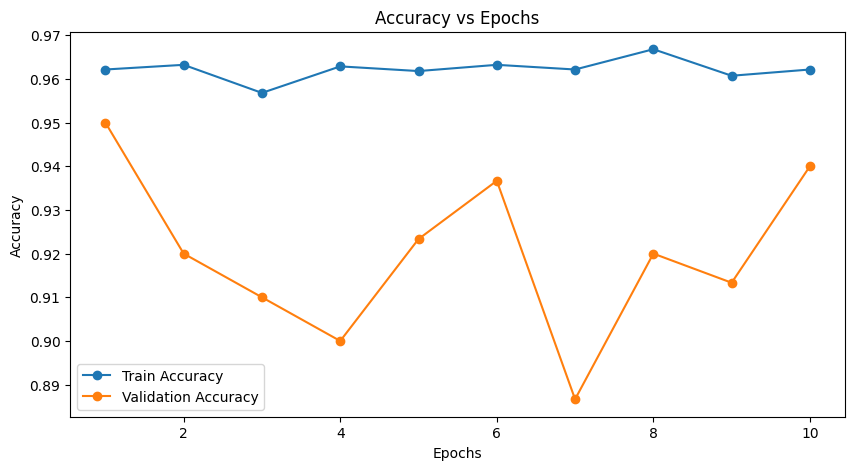

In [25]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), accuracy_per_epoch, label='Train Accuracy', marker='o')
plt.plot(range(1, 11), validation_accuracy, label='Validation Accuracy', marker='o')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

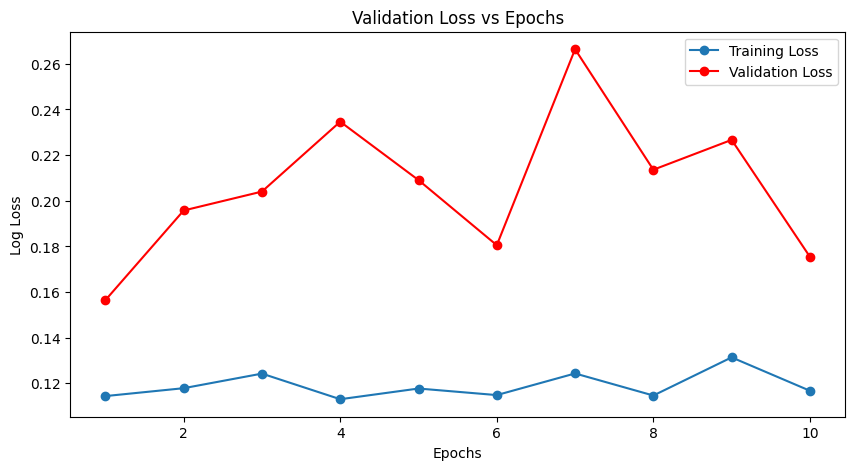

In [26]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), training_loss, label='Training Loss', marker='o')
plt.plot(range(1, 11), validation_loss, label='Validation Loss', marker='o', color='red')
plt.title('Validation Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.legend()
plt.show()

In [39]:
penalty = 'l2'

# Set the regularization strength (C)
C = 0.01

# Create a logistic regression model
model = LogisticRegression(penalty=penalty, C=C)

In [40]:
from sklearn.metrics import accuracy_score, log_loss

num_epochs = 10
batch_size = len(X_train) // num_epochs
batch = len(X_valid) // num_epochs
accuracy_per_epoch = []
validation_loss = []
training_loss = []
validation_accuracy = []

for epoch in range(num_epochs):
    start = epoch * batch_size
    end = start + batch_size
    X_batch, Y_batch = X_train[start:end], Y_train[start:end]

    model.fit(X_batch, Y_batch)
    y_pred = model.predict(X_batch)
    y_val_proba = model.predict_proba(X_batch)
    accuracy = accuracy_score(Y_batch, y_pred)
    train_loss = log_loss(Y_batch, y_val_proba)
    training_loss.append(train_loss)

    accuracy_per_epoch.append(accuracy)
    print(f"Epoch {epoch + 1}/{num_epochs}: Accuracy = {accuracy:.4f}")

    start = epoch * batch
    end = start + batch
    X_batch, Y_batch = X_valid[start:end], Y_valid[start:end]

    y_pred = model.predict(X_batch)
    y_val_proba = model.predict_proba(X_batch)
    valid_accuracy = accuracy_score(Y_batch, y_pred)
    model.fit(X_batch, Y_batch)
    val_loss = log_loss(Y_batch, y_val_proba)
    validation_loss.append(val_loss)

    validation_accuracy.append(valid_accuracy)
    print(f"Epoch {epoch + 1}/{num_epochs}: Validation_Accuracy = {valid_accuracy:.4f}")

Epoch 1/10: Accuracy = 0.9457
Epoch 1/10: Validation_Accuracy = 0.8933
Epoch 2/10: Accuracy = 0.9486
Epoch 2/10: Validation_Accuracy = 0.9200
Epoch 3/10: Accuracy = 0.9471
Epoch 3/10: Validation_Accuracy = 0.9200
Epoch 4/10: Accuracy = 0.9586
Epoch 4/10: Validation_Accuracy = 0.9333
Epoch 5/10: Accuracy = 0.9514
Epoch 5/10: Validation_Accuracy = 0.9600
Epoch 6/10: Accuracy = 0.9414
Epoch 6/10: Validation_Accuracy = 0.9867
Epoch 7/10: Accuracy = 0.9586
Epoch 7/10: Validation_Accuracy = 0.9333
Epoch 8/10: Accuracy = 0.9543
Epoch 8/10: Validation_Accuracy = 0.9600
Epoch 9/10: Accuracy = 0.9486
Epoch 9/10: Validation_Accuracy = 0.9467
Epoch 10/10: Accuracy = 0.9557
Epoch 10/10: Validation_Accuracy = 0.9467


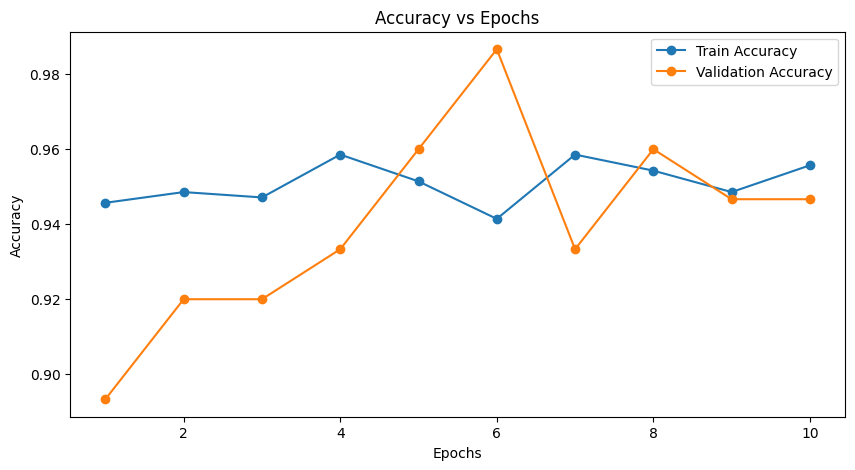

In [41]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), accuracy_per_epoch, label='Train Accuracy', marker='o')
plt.plot(range(1, 11), validation_accuracy, label='Validation Accuracy', marker='o')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

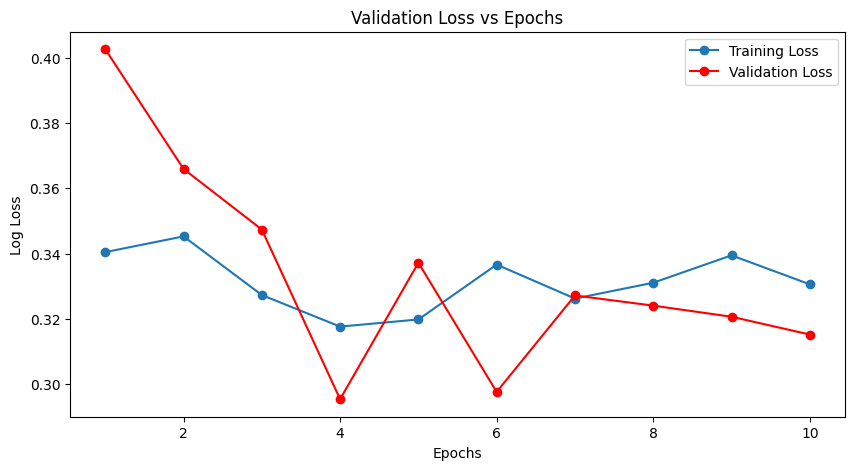

In [42]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), training_loss, label='Training Loss', marker='o')
plt.plot(range(1, 11), validation_loss, label='Validation Loss', marker='o', color='red')
plt.title('Validation Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.legend()
plt.show()

In [44]:
y_test_pred = lr.predict(X_test)
test_accuracy = accuracy_score(Y_test, y_test_pred)
print(f"Final Test Accuracy: {test_accuracy * 100:.2f}%")

Final Test Accuracy: 96.04%


In [47]:
penalty = 'l1'

# Set the regularization strength (C)
C = 0.01

# Create a logistic regression model
model = LogisticRegression(penalty=penalty, C=C, solver='liblinear')

In [48]:
from sklearn.metrics import accuracy_score, log_loss

num_epochs = 10
batch_size = len(X_train) // num_epochs
batch = len(X_valid) // num_epochs
accuracy_per_epoch = []
validation_loss = []
training_loss = []
validation_accuracy = []

for epoch in range(num_epochs):
    start = epoch * batch_size
    end = start + batch_size
    X_batch, Y_batch = X_train[start:end], Y_train[start:end]

    model.fit(X_batch, Y_batch)
    y_pred = model.predict(X_batch)
    y_val_proba = model.predict_proba(X_batch)
    accuracy = accuracy_score(Y_batch, y_pred)
    train_loss = log_loss(Y_batch, y_val_proba)
    training_loss.append(train_loss)

    accuracy_per_epoch.append(accuracy)
    print(f"Epoch {epoch + 1}/{num_epochs}: Accuracy = {accuracy:.4f}")

    start = epoch * batch
    end = start + batch
    X_batch, Y_batch = X_valid[start:end], Y_valid[start:end]

    y_pred = model.predict(X_batch)
    y_val_proba = model.predict_proba(X_batch)
    valid_accuracy = accuracy_score(Y_batch, y_pred)
    model.fit(X_batch, Y_batch)
    val_loss = log_loss(Y_batch, y_val_proba)
    validation_loss.append(val_loss)

    validation_accuracy.append(valid_accuracy)
    print(f"Epoch {epoch + 1}/{num_epochs}: Validation_Accuracy = {valid_accuracy:.4f}")

Epoch 1/10: Accuracy = 0.8486
Epoch 1/10: Validation_Accuracy = 0.8133
Epoch 2/10: Accuracy = 0.8600
Epoch 2/10: Validation_Accuracy = 0.8667
Epoch 3/10: Accuracy = 0.8800
Epoch 3/10: Validation_Accuracy = 0.8933
Epoch 4/10: Accuracy = 0.8829
Epoch 4/10: Validation_Accuracy = 0.8800
Epoch 5/10: Accuracy = 0.8643
Epoch 5/10: Validation_Accuracy = 0.8933
Epoch 6/10: Accuracy = 0.8714
Epoch 6/10: Validation_Accuracy = 0.8933
Epoch 7/10: Accuracy = 0.8857
Epoch 7/10: Validation_Accuracy = 0.8667
Epoch 8/10: Accuracy = 0.8557
Epoch 8/10: Validation_Accuracy = 0.8533
Epoch 9/10: Accuracy = 0.8686
Epoch 9/10: Validation_Accuracy = 0.8933
Epoch 10/10: Accuracy = 0.8529
Epoch 10/10: Validation_Accuracy = 0.8800


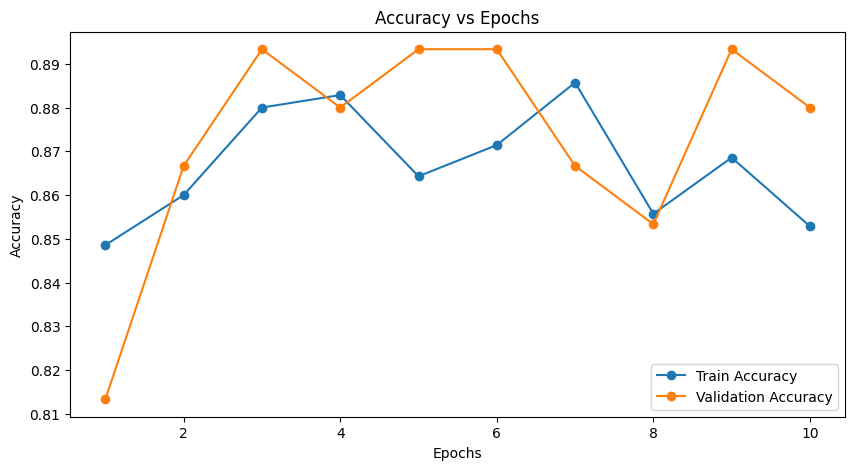

In [49]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), accuracy_per_epoch, label='Train Accuracy', marker='o')
plt.plot(range(1, 11), validation_accuracy, label='Validation Accuracy', marker='o')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

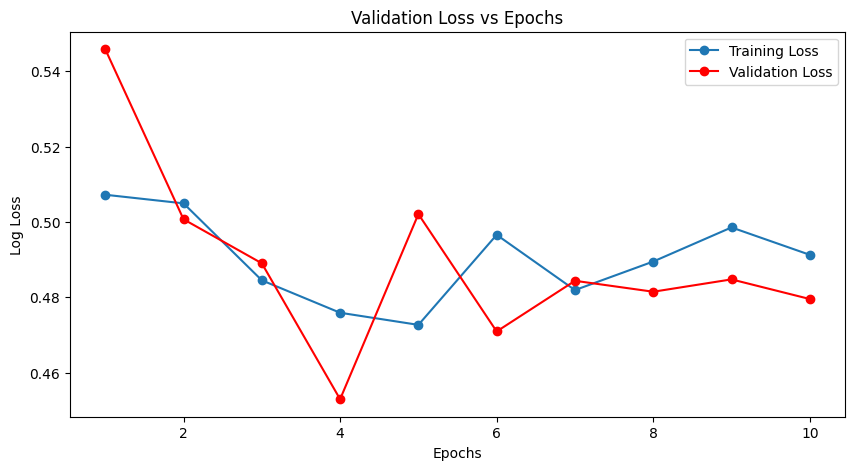

In [50]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), training_loss, label='Training Loss', marker='o')
plt.plot(range(1, 11), validation_loss, label='Validation Loss', marker='o', color='red')
plt.title('Validation Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.legend()
plt.show()

In [51]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.5, 0.7, 1]
}

# Create the XGBoost model object
xgb_model = xgb.XGBClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, Y_train)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best set of hyperparameters:  {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 1}
Best score:  0.9775714285714286


In [15]:
import xgboost as xgb
model = xgb.XGBClassifier(max_depth=3, learning_rate=0.1, subsample=1)

In [16]:
from sklearn.metrics import accuracy_score, log_loss

num_epochs = 10
batch_size = len(X_train) // num_epochs
batch = len(X_valid) // num_epochs
accuracy_per_epoch = []
validation_loss = []
training_loss = []
validation_accuracy = []

for epoch in range(num_epochs):
    start = epoch * batch_size
    end = start + batch_size
    X_batch, Y_batch = X_train[start:end], Y_train[start:end]

    model.fit(X_batch, Y_batch)
    y_pred = model.predict(X_batch)
    y_val_proba = model.predict_proba(X_batch)
    accuracy = accuracy_score(Y_batch, y_pred)
    train_loss = log_loss(Y_batch, y_val_proba)
    training_loss.append(train_loss)

    accuracy_per_epoch.append(accuracy)
    print(f"Epoch {epoch + 1}/{num_epochs}: Accuracy = {accuracy:.4f}")

    start = epoch * batch
    end = start + batch
    X_batch, Y_batch = X_valid[start:end], Y_valid[start:end]

    y_pred = model.predict(X_batch)
    y_val_proba = model.predict_proba(X_batch)
    valid_accuracy = accuracy_score(Y_batch, y_pred)
    model.fit(X_batch, Y_batch)
    val_loss = log_loss(Y_batch, y_val_proba)
    validation_loss.append(val_loss)

    validation_accuracy.append(valid_accuracy)
    print(f"Epoch {epoch + 1}/{num_epochs}: Validation_Accuracy = {valid_accuracy:.4f}")

Epoch 1/10: Accuracy = 0.9361
Epoch 1/10: Validation_Accuracy = 0.9200
Epoch 2/10: Accuracy = 0.9353
Epoch 2/10: Validation_Accuracy = 0.9360
Epoch 3/10: Accuracy = 0.9319
Epoch 3/10: Validation_Accuracy = 0.9253
Epoch 4/10: Accuracy = 0.9359
Epoch 4/10: Validation_Accuracy = 0.9227
Epoch 5/10: Accuracy = 0.9379
Epoch 5/10: Validation_Accuracy = 0.9293
Epoch 6/10: Accuracy = 0.9341
Epoch 6/10: Validation_Accuracy = 0.9293
Epoch 7/10: Accuracy = 0.9313
Epoch 7/10: Validation_Accuracy = 0.9373
Epoch 8/10: Accuracy = 0.9341
Epoch 8/10: Validation_Accuracy = 0.9280
Epoch 9/10: Accuracy = 0.9351
Epoch 9/10: Validation_Accuracy = 0.9293
Epoch 10/10: Accuracy = 0.9316
Epoch 10/10: Validation_Accuracy = 0.9253


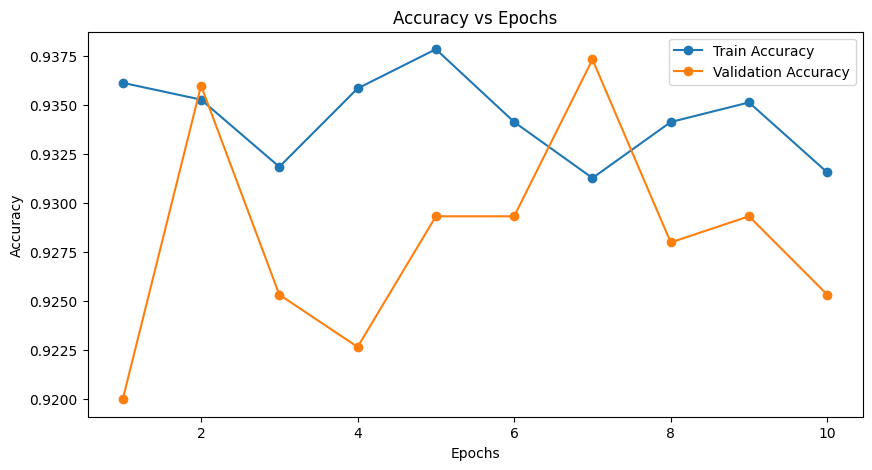

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), accuracy_per_epoch, label='Train Accuracy', marker='o')
plt.plot(range(1, 11), validation_accuracy, label='Validation Accuracy', marker='o')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

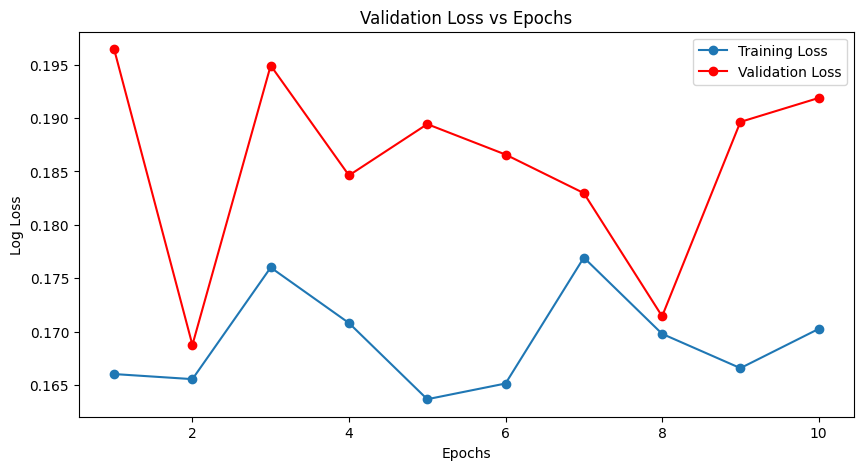

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), training_loss, label='Training Loss', marker='o')
plt.plot(range(1, 11), validation_loss, label='Validation Loss', marker='o', color='red')
plt.title('Validation Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.legend()
plt.show()